# Dados Campus Sertãozinho


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
dados = pd.read_csv('Relatorio_novo_1.CSV')

In [3]:
dados = dados.loc[dados['Modalidade'] != "FIC"]

In [4]:
dados = dados.drop(["Matrícula"],axis = 1)

# Filtros

In [5]:
dados['Descrição do Curso'].value_counts()

TÉCNICO EM AUTOMAÇÃO INDUSTRIAL INTEGRADO AO ENSINO MÉDIO                                  780
LICENCIATURA EM QUÍMICA                                                                    672
TÉCNICO EM QUÍMICA INTEGRADO AO ENSINO MÉDIO                                               665
TÉCNICO EM MECÂNICA INTEGRADO AO ENSINO MÉDIO NaN PROEJA                                   654
TECNOLOGIA EM GESTÃO DE RECURSOS HUMANOS                                                   588
BACHARELADO EM ENGENHARIA MECÂNICA                                                         562
TECNOLOGIA EM AUTOMAÇÃO INDUSTRIAL                                                         436
PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTES PARA A EDUCAÇÃO BÁSICA                           398
MESTRADO PROFISSIONAL EM EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA EM REDE NACIONAL (PROFEPT)    383
TÉCNICO EM ADMINISTRAÇÃO                                                                   360
TÉCNICO EM ELETRÔNICA                             

In [6]:
dados['Modalidade'].value_counts()

Técnico Integrado                   1569
Licenciatura                        1413
Tecnologia                          1251
Técnico Concomitante/Subsequente    1061
Bacharelado                          875
Técnico Integrado EJA                821
Mestrado                             383
Técnico Subsequente                   97
Name: Modalidade, dtype: int64

In [7]:
dados = dados.loc[dados['Modalidade'] == 'Licenciatura']
dados

,#,Ano de Ingresso,Deficiência,Descrição do Curso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Modalidade,Nacionalidade,Renda Per Capita,Sexo,Situação no Curso,Tipo de Escola de Origem
3,4,2016,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Licenciatura,Brasileira,NaN,M,Cancelado,Pública
4,5,2023,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,Ampla Concorrência SISU,Licenciatura,Brasileira,"0,96",M,Cancelado,Privada
8,9,2020,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Parda,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Licenciatura,Brasileira,"0,33",M,Cancelado,Pública
52,53,2011,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Não declarado,Ampla Concorrência (Vestibular),Licenciatura,Brasileira,NaN,F,Evasão,Pública
73,74,2008,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Não declarado,Ampla Concorrência (Vestibular),Licenciatura,Brasileira,NaN,F,Evasão,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11885,11886,2023,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,SiSU L1 (SGC L1) NaN Candidatos com renda fami...,Licenciatura,Brasileira,NaN,F,Cancelado,Pública
11886,11887,2017,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Branca,Seleção Geral Graduação (SiSU) (Inativa),Licenciatura,Brasileira,NaN,F,Cancelado,Privada
11887,11888,2022,Sem Necessidade Especial,LICENCIATURA EM LETRAS NaN HABILITAÇÃO EM PORT...,SP,Branca,Ampla Concorrência (Geral),Licenciatura,Brasileira,"0,36",F,Matriculado,Pública
11889,11890,2013,Sem Necessidade Especial,LICENCIATURA EM QUÍMICA,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),Licenciatura,Brasileira,NaN,F,Formado,Privada


# Número de alunos

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

In [10]:
dados['Ano de Ingresso'].value_counts()


2017    134
2019    133
2023    131
2018    125
2021    109
2022    107
2020     92
2016     89
2014     84
2015     79
2012     77
2011     70
2013     54
2009     48
2008     42
2010     39
Name: Ano de Ingresso, dtype: int64

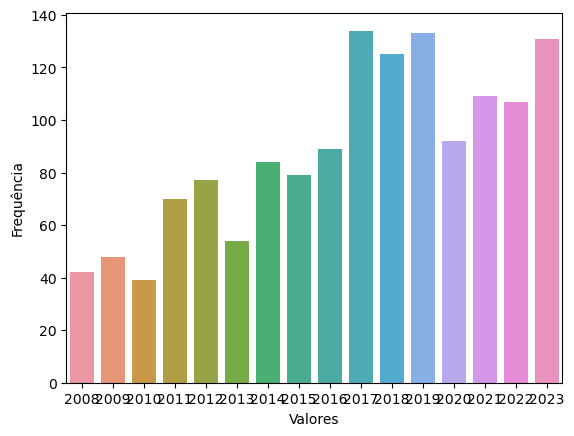

<Figure size 1000x1000 with 0 Axes>

In [11]:
# Para começar a análise dos dados foi relevante enxergar o número de alunos em geral no campus Sertãozinho com o decorrer dos anos.
sns.countplot(x = dados['Ano de Ingresso'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.figure(figsize= (10,10))
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10

# Raça

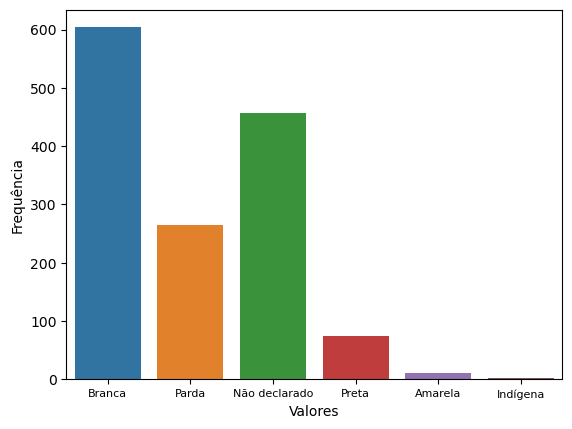

In [12]:
# A primeira informação buscada na análise foi relacionada com raça/etnia/cor, no primeiro gráfico
# é possível observar a quantidade de alunos de cada raça/etnia/cor e também os que não declararam no campus Sertãozinho. 
# Podemos perceber graficamente que o número de brancos é alto em comparação com o restante.
sns.countplot(x = dados['Etnia/Raça/Cor'])
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

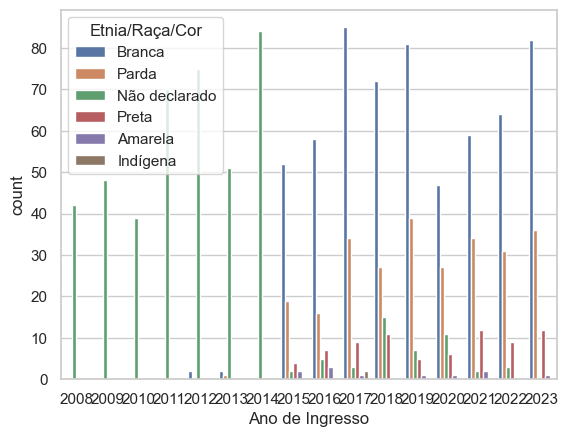

In [13]:
# Após analisarmos a quantidade bruta de alunos com relação a raça/cor/etnia, agora podemos analisar no gráfico 
# a quantidade através dos anos, é possível notar que até dois mil e quinze o alunos quase não se declaravam, após esse ano é possível
# ver que há um aumento significativo no nos alunos se declarando e uma clara diminuição nos que não se declaram.

sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Ano de Ingresso', hue='Etnia/Raça/Cor')

plt.show()

In [14]:
dados['Etnia/Raça/Cor'].value_counts()

Branca           604
Não declarado    457
Parda            264
Preta             75
Amarela           11
Indígena           2
Name: Etnia/Raça/Cor, dtype: int64

# Tipo de escolaridade

<Axes: xlabel='Tipo de Escola de Origem', ylabel='count'>

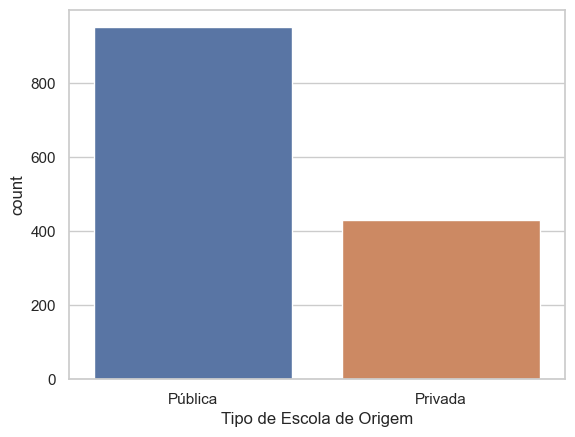

In [15]:
# Neste novo tópico será possivel analisar a escolaridade de origem dos alunos, sendo pública ou privada, uma informação 
# importante para os próximos passos do projeto. No gráfico a seguir existe uma diferença grande entre público e privado, com público sendo maior. 
sns.countplot(x = dados['Tipo de Escola de Origem'])

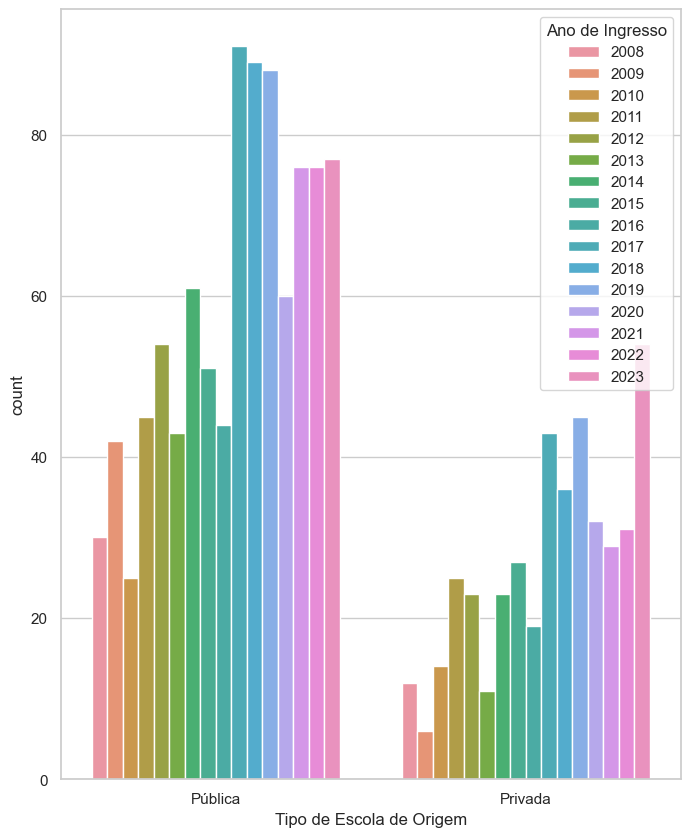

In [16]:
# No gráfico a seguir é possível ver o número de alunos e suas escolaridades de origem ao decorrer dos anos, é interessante analisar
# um aumento de ambas, pública e privada, nos anos de 2021 e 2022, anos de pandemia.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Tipo de Escola de Origem', hue='Ano de Ingresso')
plt.show()

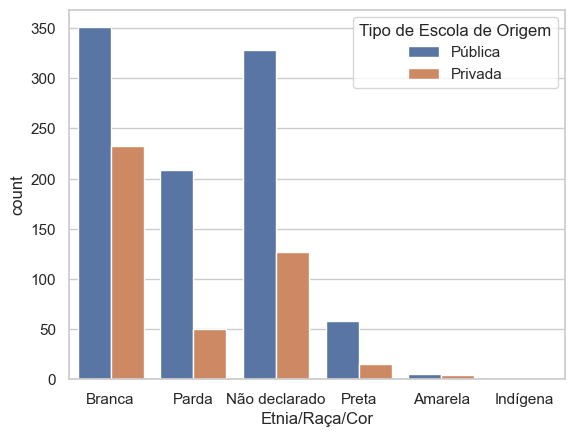

In [17]:
# Outra informação batante relevante para este estudo é mostrado no gráfico abaixo, onde existe uma disparidade alta entre 
# escolas de origem pública e privada, principalmente entre os alunos brancos.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Etnia/Raça/Cor', hue='Tipo de Escola de Origem')
plt.show()

In [18]:
dados['Descrição do Curso'].value_counts()

LICENCIATURA EM QUÍMICA                                             672
PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTES PARA A EDUCAÇÃO BÁSICA    398
LICENCIATURA EM LETRAS NaN HABILITAÇÃO EM PORTUGUÊS E INGLÊS        301
FORMAÇÃO PEDAGÓGICA PARA GRADUADOS NÃO LICENCIADOS                   42
Name: Descrição do Curso, dtype: int64

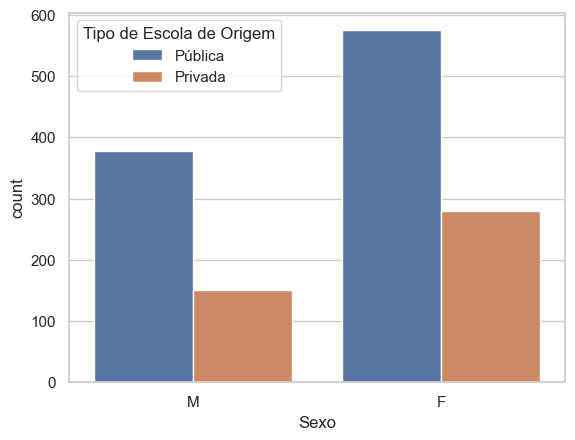

In [19]:
# Nas próximas conclusões que foram possíveis tirar a partir do gráfico abaixo, vemos a diferença entre
# o número de alunos de gênero masculino e feminino com relção a escola de origem, sendo bem perceptível um equilibrio.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Tipo de Escola de Origem')
plt.show()

# Gênero

<Axes: xlabel='Sexo', ylabel='count'>

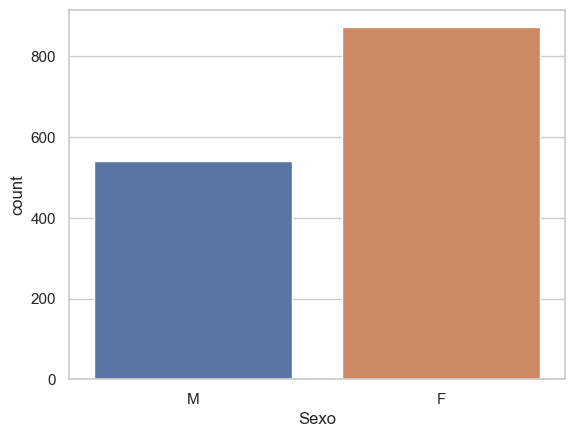

In [20]:
# Agora será feita uma ánalise sobre questões de gênero. Primeiro o gráfico a seguir mostra um equilíbrio entre o número geral de 
# homens e mulheres no campus. Um adendo importante é que os dados se resumem apenas a gênero masculino e feminino. 
sns.countplot(x = dados['Sexo'])

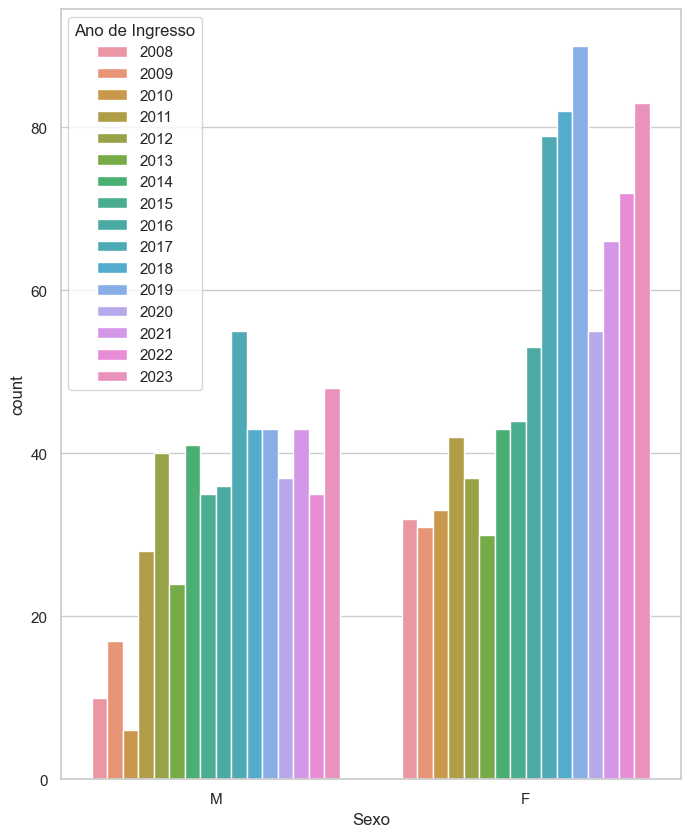

In [21]:
# É possível concluir a partir do próximo gráfico e dos anteriores também, um aumente relevante de alunos, de ambos os gêneros 
# analisados, nos anos de pandemia, pricnipalamente para mulheres no ano de dois mil e vinte um.
plt.figure(figsize= (8,10))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Ano de Ingresso')
plt.show()

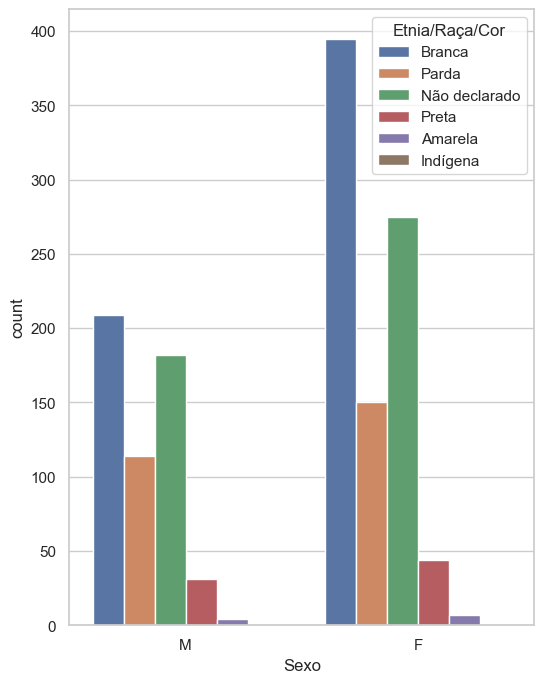

In [22]:
# Com relação a raça, o gráfico a seguir mostra, assim como analisado anteriormente, um grande número de alunos brancos e seguidos 
# por alunos pardos com uma certa distância.
plt.figure(figsize= (6,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Sexo', hue='Etnia/Raça/Cor')
plt.show()

# Evasão

In [23]:
dados['Situação no Curso'].value_counts()

Evasão                             530
Cancelado                          270
Matriculado                        229
Concluído                          194
Formado                            155
Matrícula Vínculo Institucional     14
Trancado Voluntariamente            11
Transferido Interno                  4
Transferido Externo                  4
Cancelamento Compulsório             2
Name: Situação no Curso, dtype: int64

In [24]:
dados_Evas = dados[dados['Situação no Curso']=='Evasão']

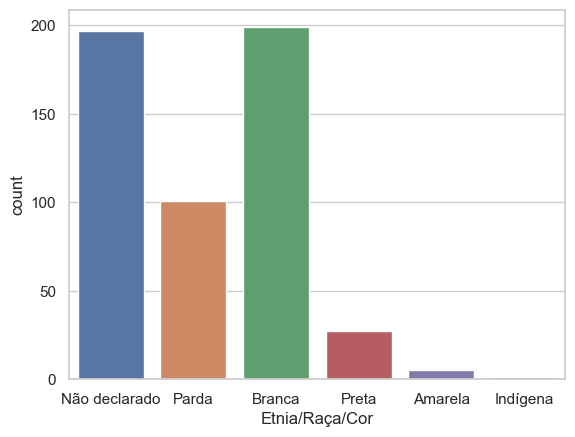

In [25]:
# O tópico de evasão é um dos mais importantes do projeto, nele pode-se observar algumas informações que serão muito importante para as 
# conclusões, no gráfico a seguir foi filtrado uma base de dados só com os alunos que evadiram em relação a raça/etnia/cor.
sns.countplot(x = dados_Evas['Etnia/Raça/Cor'])
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 15

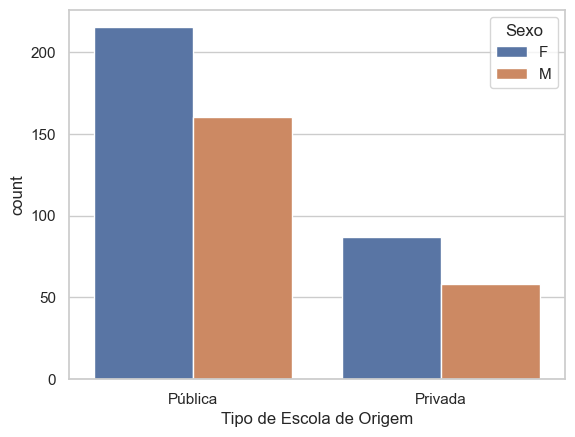

In [26]:
# Agora a análise de evasão é feita pela escola de origem e gênero, é possível perceber um alto número de alunos de origem de escola pública e
# homens que evadem mais. 
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Tipo de Escola de Origem', hue='Sexo')
plt.show()

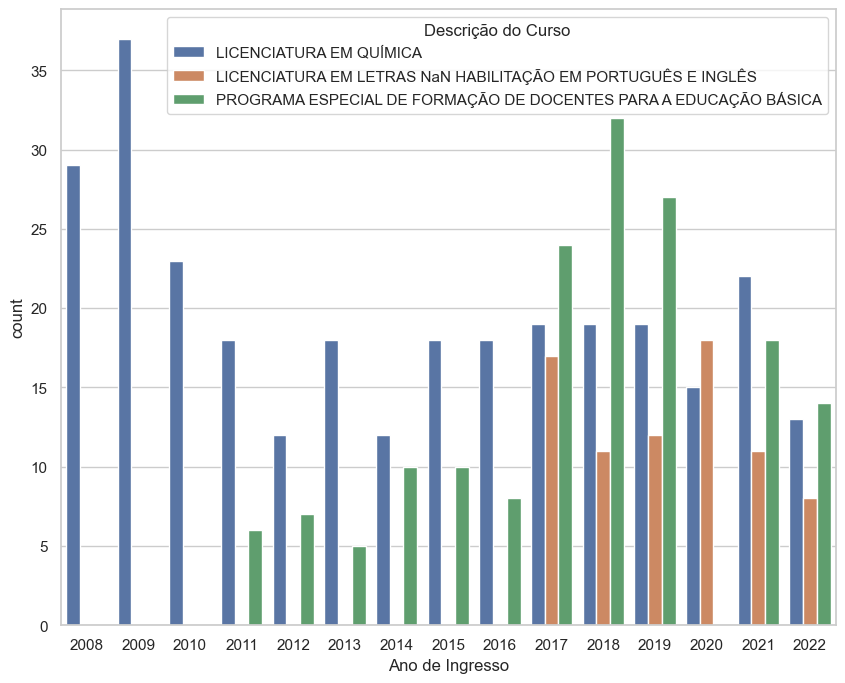

In [27]:
# Agora será analisado o número geral de evadidos, em todos os cursos e modalidades do campus, ao passar dos anos, 
# peecebendo um ápice em dois mil e dezoito e uma queda nos anos de pandemia, dois mil e vinte e vinte um.
plt.figure(figsize= (10,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Evas, x='Ano de Ingresso', hue='Descrição do Curso')
plt.show()

In [28]:
dados['Descrição do Curso'].value_counts()

LICENCIATURA EM QUÍMICA                                             672
PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTES PARA A EDUCAÇÃO BÁSICA    398
LICENCIATURA EM LETRAS NaN HABILITAÇÃO EM PORTUGUÊS E INGLÊS        301
FORMAÇÃO PEDAGÓGICA PARA GRADUADOS NÃO LICENCIADOS                   42
Name: Descrição do Curso, dtype: int64

# Deficiência

In [29]:
dados_Def = dados[dados['Deficiência']=='PCD']

In [30]:
dados['Deficiência'].value_counts()

Sem Necessidade Especial    1400
PCD                           13
Name: Deficiência, dtype: int64

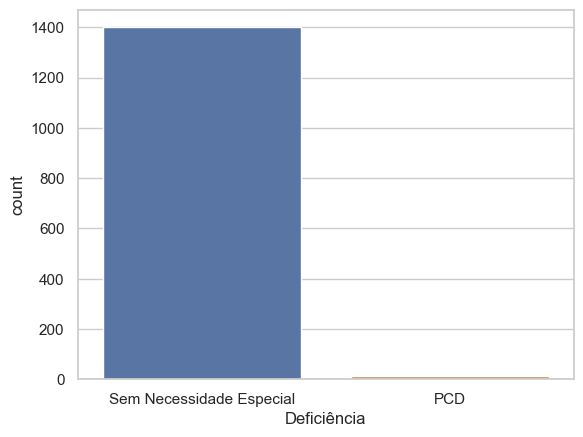

In [31]:
# O tópico de pessoas com deficiêcia (PCD) é importante para analisarmos o avanço do número geral desses alunos no campus 
# e muito importante para mostrar os avanços de acessibilidade do campus. No gráfico a seguir podemos ver a comparação de alunos PCD com alunos
# sem necessidades especiais.
sns.countplot(x = dados['Deficiência'])
plt.rcParams['xtick.labelsize'] = 8

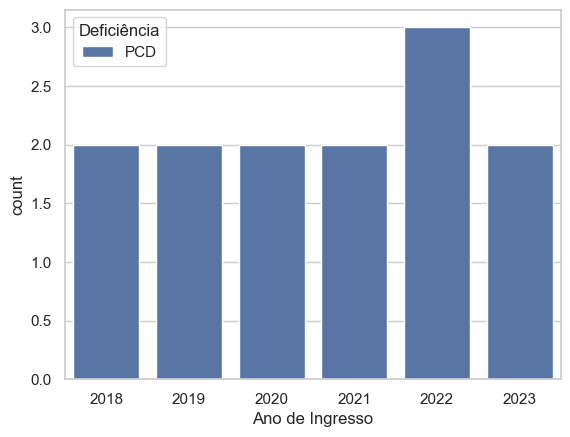

In [32]:
# A seguir será analisado a evolução no número de alunos PCD ao passar dos anos, mostrando um aumento substâncial nos anos de 
# dois mil e vinte um e vinte dois.
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Ano de Ingresso', hue='Deficiência')
plt.show()

In [33]:
dados_Def['Ano de Ingresso'].value_counts()

2022    3
2023    2
2020    2
2018    2
2021    2
2019    2
Name: Ano de Ingresso, dtype: int64

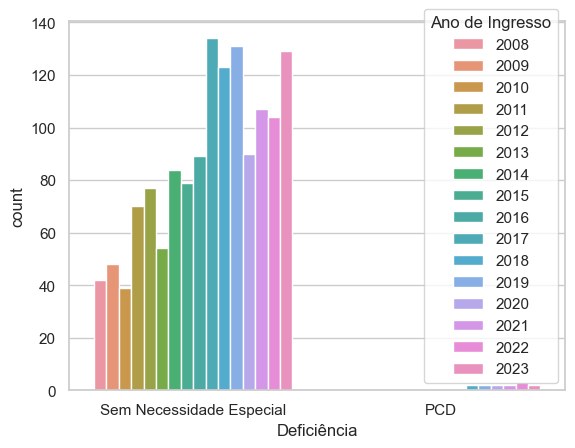

In [34]:
sns.set_theme(style="whitegrid")
sns.countplot(data=dados, x='Deficiência', hue='Ano de Ingresso')
plt.show()

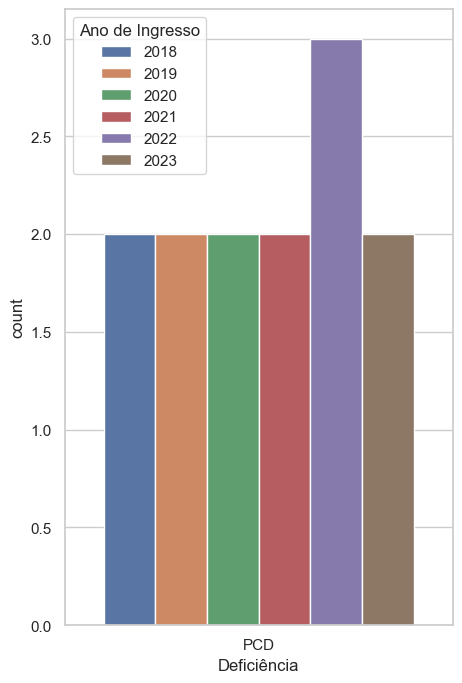

In [35]:
plt.figure(figsize= (5,8))
sns.set_theme(style="whitegrid")
sns.countplot(data=dados_Def, x='Deficiência', hue='Ano de Ingresso')
plt.show()

# Regras de Associação

In [36]:
!pip install apyori

In [37]:
import pandas as pd
from apyori import apriori


In [38]:
dados_Evas = dados_Evas.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [39]:
dados_Evas = dados_Evas.drop(["Descrição do Curso"],axis = 1)

In [40]:
dados_Evas = dados_Evas.drop(["Renda Per Capita"],axis = 1)

In [41]:
dados_Evas

,#,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
52,53,2011,SP,Não declarado,Ampla Concorrência (Vestibular),F,Pública
73,74,2008,SP,Não declarado,Ampla Concorrência (Vestibular),F,Pública
169,170,2009,NaN,Não declarado,Ampla Concorrência (Vestibular),M,Pública
171,172,2019,SP,Parda,Ampla Concorrência SISU,F,Pública
196,197,2022,SP,Branca,Ampla Concorrência (Geral),M,Privada
...,...,...,...,...,...,...,...
11770,11771,2021,SP,Parda,Escola Pública + PPI,M,Pública
11822,11823,2013,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),M,Pública
11824,11825,2013,SP,Não declarado,Seleção Geral Graduação (SiSU) (Inativa),M,Pública
11864,11865,2018,SP,Parda,"SiSU L5 (SGC L3) NaN Candidatos que, independe...",M,Pública


In [42]:
dados_Evas.shape

(530, 7)

In [43]:
dados.shape

(1413, 13)

In [44]:
Lista = []
for i in range(len(dados_Evas)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Evas.values[i, j]) for j in range(dados_Evas.shape[1])])

In [53]:
regras = apriori(Lista, min_support = 0.06, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

9

In [54]:
resultados

[RelationRecord(items=frozenset({'Ampla Concorrência (Vestibular)', '2009'}), support=0.06981132075471698, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2009'}), items_add=frozenset({'Ampla Concorrência (Vestibular)'}), confidence=1.0, lift=4.818181818181818)]),
 RelationRecord(items=frozenset({'2009', 'Não declarado'}), support=0.06981132075471698, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2009'}), items_add=frozenset({'Não declarado'}), confidence=1.0, lift=2.690355329949239)]),
 RelationRecord(items=frozenset({'Ampla Concorrência (Vestibular)', '2009', 'Não declarado'}), support=0.06981132075471698, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2009'}), items_add=frozenset({'Ampla Concorrência (Vestibular)', 'Não declarado'}), confidence=1.0, lift=5.196078431372548), OrderedStatistic(items_base=frozenset({'Ampla Concorrência (Vestibular)', '2009'}), items_add=frozenset({'Não declarado'}), confidence=1.0, lift=2.690355329949239), OrderedS

In [56]:
dados_Form = dados.loc[dados['Situação no Curso'] == "Concluído"]

In [57]:
dados_Form = dados_Form.drop(["Modalidade","Situação no Curso","Deficiência","Nacionalidade"],axis = 1)

In [58]:
dados_Form = dados_Form.drop(["Renda Per Capita"],axis = 1)

In [59]:
dados_Form = dados_Form.drop(["Descrição do Curso"],axis = 1)

In [60]:
dados_Form

,#,Ano de Ingresso,Estado,Etnia/Raça/Cor,Forma de Ingresso,Sexo,Tipo de Escola de Origem
87,88,2015,SP,Parda,Ampla Concorrência (Vestibular),F,Privada
159,160,2015,SP,Branca,Seleção por Análise de Currículo (Inativa),M,Privada
280,281,2019,SP,Branca,Processo Seletivo Simplificado NaN Ampla Conco...,F,Pública
308,309,2013,SP,Não declarado,Seleção por Análise de Currículo (Inativa),M,Pública
326,327,2012,SP,Não declarado,Seleção por Análise de Currículo (Inativa),M,Privada
...,...,...,...,...,...,...,...
11610,11611,2013,SP,Não declarado,Seleção por Análise de Currículo (Inativa),M,Pública
11623,11624,2012,SP,Não declarado,Seleção por Análise de Currículo (Inativa),M,Pública
11634,11635,2015,SP,Branca,Seleção por Análise de Currículo (Inativa),M,Pública
11676,11677,2014,SP,Não declarado,Seleção por Análise de Currículo (Inativa),M,Privada


In [61]:
Lista = []
for i in range(len(dados_Form)):
  #print(i)
  #print(base_mercado1.values[i, 0])
  Lista.append([str(dados_Form.values[i, j]) for j in range(dados_Form.shape[1])])

In [62]:
regras = apriori(Lista, min_support = 0.09, min_confidence = 1, min_lift = 2)
resultados = list(regras)
len(resultados)

7

In [63]:
resultados

[RelationRecord(items=frozenset({'2011', 'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), support=0.10309278350515463, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2011'}), items_add=frozenset({'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), confidence=1.0, lift=2.131868131868132)]),
 RelationRecord(items=frozenset({'2012', 'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), support=0.12886597938144329, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2012'}), items_add=frozenset({'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), confidence=1.0, lift=2.131868131868132)]),
 RelationRecord(items=frozenset({'2011', 'SP', 'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), support=0.0979381443298969, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2011', 'SP'}), items_add=frozenset({'Seleção por Análise de Currículo (Inativa)', 'Não declarado'}), confidence=1.0, lift=2.1318681318